# Assignment 1  computer Vision ELG7186[EI]


#### **Name:Eslam Ahmed Abdelrahman Mahmoud           <br> ID:300267020**


**please upload attached samples.zip file**

In [1]:
from ipywidgets import FileUpload
upload = FileUpload()
upload


FileUpload(value={}, description='Upload')

In [2]:
import glob 
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import skimage
from skimage import io
from skimage.transform import resize
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn import metrics
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import plot_confusion_matrix


In [3]:
import zipfile as zf
files = zf.ZipFile("samples.zip", 'r')
files.extractall('samples')
files.close()

## 1.1 Getting Started [3] 


Save data from samples folder

In [4]:
data_0 = [skimage.io.imread(file) for file in glob.glob("samples/Sample_0/*.png")]
data_8 = [skimage.io.imread(file) for file in glob.glob("samples/Sample_8/*.png")]
data_G = [skimage.io.imread(file) for file in glob.glob("samples/Sample_G/*.png")]
data_q = [skimage.io.imread(file) for file in glob.glob("samples/Sample_q/*.png")]


 __preprocess on our picture__ 
<br> convert to gray
<br>set size to 128x128

In [5]:
pre_data_0 , pre_data_8 , pre_data_G , pre_data_q = [],[],[],[]

def preprocess(data,pre):
    for i in range(len(data)):  
        img = data[i]
        img = skimage.color.rgb2gray(img)
        img = resize(img,(128,128))
        img = np.array(img)
        pre.append(img)
        
    return np.array(pre)

#presprocess data
preprocess(data_0,pre_data_0)
preprocess(data_8,pre_data_8)
preprocess(data_G,pre_data_G)
preprocess(data_q,pre_data_q)

pre_All_data = np.array(pre_data_0 + pre_data_q + pre_data_G+pre_data_8)

pre_All_data = pre_All_data.reshape(len(pre_All_data),-1)

<ipython-input-5-ea673a0c5b51>:6: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  img = skimage.color.rgb2gray(img)


Create lable to our data

In [6]:
K=[]
K[:148]=148*[0] #maps to the class "o"
K[148:203]=54*[1] #maps to class "q"
K[203:346]=143*[2] #maps to class "G"
K[346:]=32*[3]  #maps to class "8"
K=np.array(K)

Data = np.column_stack((K, pre_All_data))

O_Q_data = Data[0:202,]
X_O_Q_data = O_Q_data[:,1:]
y_O_Q_data = O_Q_data[:,0]

G_8_data = Data[202:,]
X_G_8_data = G_8_data[:,1:]
y_G_8_data = G_8_data[:,0]



## 1.2 **Binary Classifiers** [4]


###  1.2.1 logistic regression classifiers between (O & Q)

In [7]:
#split data to ( 80% train,10% test, 10% validate )
# selecting images is random
X_train, X_test, y_train, y_test = train_test_split(X_O_Q_data, y_O_Q_data, test_size=0.2, random_state=1)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1) # 0.25 x 0.8 = 0.2

In [8]:
#apply logistic regression model
compare_logistic = True

if compare_logistic:
    from sklearn.linear_model import LogisticRegression
    bin_clf = LogisticRegression(max_iter=100, solver='liblinear')
    bin_clf.fit(X_train,y_train)


   ##### 1.2.1.1 Predect with test data

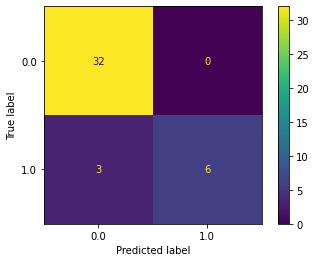

Accuracy: 0.93 %
precision: 1.00
recall: 0.67
f1_score: 0.80


In [9]:
y_pred = bin_clf.predict(X_test)

conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)
plot_confusion_matrix(bin_clf, X_test, y_test)  
plt.show()
TN, FP, FN, TP = confusion_matrix(y_true=y_test, y_pred=y_pred).ravel()

Accuracy = (TP + TN)/(TP + TN + FP + FN)
print(f"Accuracy: {Accuracy:4.2f} %")

precision = TP / (TP + FP)
print(f"precision: {precision:4.2f}")

recall = TP / (TP + FN)
print(f"recall: {recall:4.2f}")

f1_score = 2 * precision * recall / (precision + recall)
print(f"f1_score: {f1_score:4.2f}")


roc_auc_score for Binary Classifiers test:  0.7743055555555556


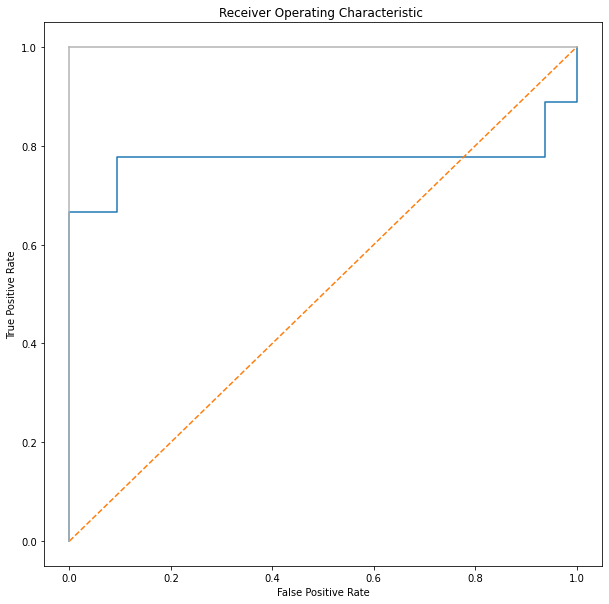

In [10]:
#############################################
# Compute ROC curve and ROC area

y_score = bin_clf.fit(X_train, y_train).decision_function(X_test)

false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(y_test, y_score)

print('roc_auc_score for Binary Classifiers test: ', roc_auc_score(y_test, y_score))


plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic ')
plt.plot(false_positive_rate1, true_positive_rate1)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

   ##### 1.2.1.2 Predect with train data

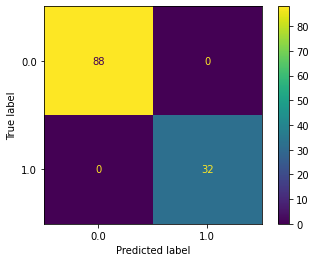

Accuracy: 1.00 %
precision: 1.00
recall: 1.00
f1_score: 1.00
roc_auc_score for Binary Classifiers test:  1.0


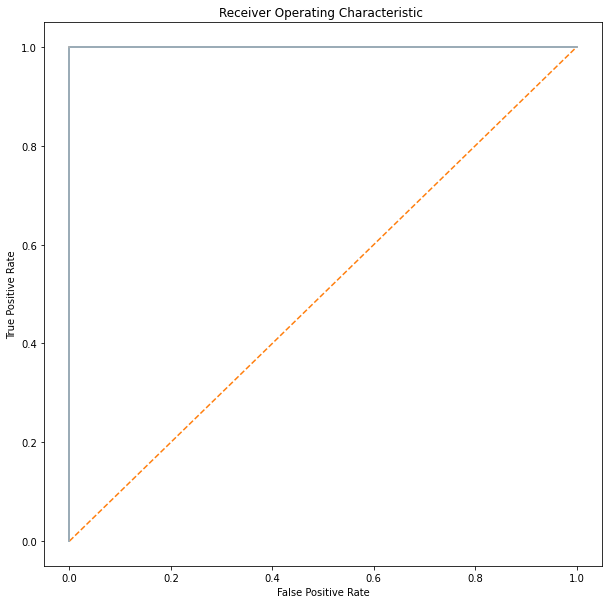

In [11]:
y_pred = bin_clf.predict(X_train)
conf_matrix = confusion_matrix(y_true=y_train, y_pred=y_pred)
plot_confusion_matrix(bin_clf, X_train, y_train)  
plt.show()
TN, FP, FN, TP = confusion_matrix(y_true=y_train, y_pred=y_pred).ravel()

Accuracy = (TP + TN)/(TP + TN + FP + FN)
print(f"Accuracy: {Accuracy:4.2f} %")

precision = TP / (TP + FP)
print(f"precision: {precision:4.2f}")

recall = TP / (TP + FN)
print(f"recall: {recall:4.2f}")

f1_score = 2 * precision * recall / (precision + recall)
print(f"f1_score: {f1_score:4.2f}")

#############################################
# Compute ROC curve and ROC area 

y_score = bin_clf.fit(X_train, y_train).decision_function(X_train)

false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(y_train, y_score)

print('roc_auc_score for Binary Classifiers test: ', roc_auc_score(y_train, y_score))


plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic ')
plt.plot(false_positive_rate1, true_positive_rate1)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()



###  1.2.2 logistic regression classifiers between (G & 8)

In [12]:
y_G_8_data = np.where(y_G_8_data == 2, 0, y_G_8_data)
y_G_8_data = np.where(y_G_8_data == 3, 1, y_G_8_data)
#split G & 8 data 

X_train, X_test, y_train, y_test = train_test_split(X_G_8_data, y_G_8_data, test_size=0.1, random_state=122)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=122) # 0.25 x 0.8 = 0.2



In [13]:
compare_logistic = True

if compare_logistic:
    from sklearn.linear_model import LogisticRegression
    bin_clf = LogisticRegression(max_iter=100, solver='liblinear',random_state=80)
    bin_clf.fit(X_train,y_train)


#### 1.2.2.1 Predect with test data

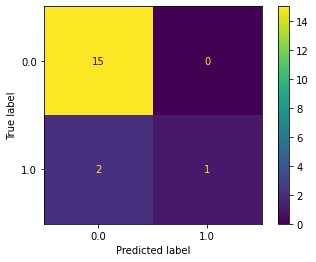

Accuracy: 0.89 %
precision: 1.00
recall: 0.33
f1_score: 0.50


In [14]:
y_pred = bin_clf.predict(X_test)
# calcutate and plot confusion matrix
conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)
plot_confusion_matrix(bin_clf, X_test, y_test)  
plt.show()

conf_mx_test  = confusion_matrix(y_test, y_pred)
conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)

TN, FP, FN, TP = confusion_matrix(y_true=y_test, y_pred=y_pred).ravel()

Accuracy = (TP + TN)/(TP + TN + FP + FN)
print(f"Accuracy: {Accuracy:4.2f} %")

precision = TP / (TP + FP)
print(f"precision: {precision:4.2f}")

recall = TP / (TP + FN)
print(f"recall: {recall:4.2f}")

f1_score = 2 * precision * recall / (precision + recall)
print(f"f1_score: {f1_score:4.2f}")

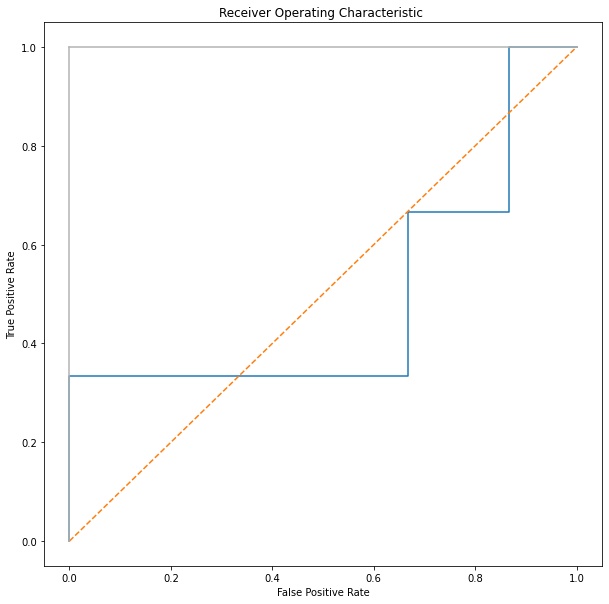

In [15]:
# plot ROC Curve
y_score = bin_clf.fit(X_train, y_train).decision_function(X_test)

false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(y_test, y_score)

#print('roc_auc_score : ', roc_auc_score(y_test, y_score))


plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic ')
plt.plot(false_positive_rate1, true_positive_rate1)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

#### 1.2.2.2 Predect with train data

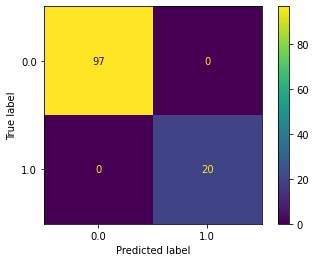

In [16]:
y_pred = bin_clf.predict(X_train)

conf_matrix = confusion_matrix(y_true=y_train, y_pred=y_pred)
plot_confusion_matrix(bin_clf, X_train, y_train)  
plt.show()
conf_mx_test  = confusion_matrix(y_train, y_pred)

In [17]:
# Calculate the confusion matrix

conf_matrix = confusion_matrix(y_true=y_train, y_pred=y_pred)

TN, FP, FN, TP = confusion_matrix(y_true=y_train, y_pred=y_pred).ravel()

Accuracy = (TP + TN)/(TP + TN + FP + FN)
print(f"Accuracy: {Accuracy:4.2f} %")

precision = TP / (TP + FP)
print(f"precision: {precision:4.2f}")

recall = TP / (TP + FN)
print(f"recall: {recall:4.2f}")

f1_score = 2 * precision * recall / (precision + recall)
print(f"f1_score: {f1_score:4.2f}")

Accuracy: 1.00 %
precision: 1.00
recall: 1.00
f1_score: 1.00


roc_auc_score :  1.0


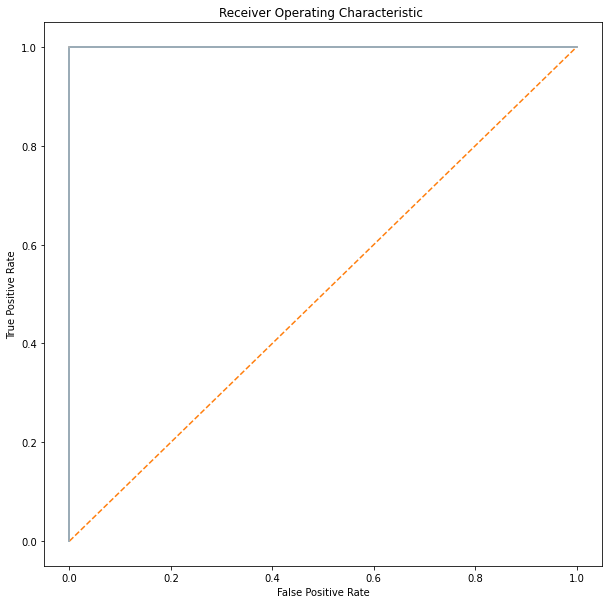

In [18]:

y_score = bin_clf.fit(X_train, y_train).decision_function(X_train)

false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(y_train, y_score)

print('roc_auc_score : ', roc_auc_score(y_train, y_score))


plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic ')
plt.plot(false_positive_rate1, true_positive_rate1)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## 1.3 Multiclass Classifier [3]


In [19]:
#select feature and lables 
X_data = Data[:,1:]
y_data = Data[:,0]
#split data to train, test, validate
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2, random_state=1)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1) # 0.25 x 0.8 = 0.2


In [20]:
nn_mclf = MLPClassifier(max_iter=100,solver='sgd',verbose='true',validation_fraction=0.0)

nn_mclf.fit(X_train, y_train)


Iteration 1, loss = 1.34623911
Iteration 2, loss = 1.28686984
Iteration 3, loss = 1.35210726
Iteration 4, loss = 1.23401112
Iteration 5, loss = 1.18125178
Iteration 6, loss = 1.15709490
Iteration 7, loss = 1.12896887
Iteration 8, loss = 1.16993046
Iteration 9, loss = 1.13630362
Iteration 10, loss = 1.08302122
Iteration 11, loss = 1.07296478
Iteration 12, loss = 1.03678298
Iteration 13, loss = 1.01202002
Iteration 14, loss = 1.14285490
Iteration 15, loss = 0.96694372
Iteration 16, loss = 0.98587606
Iteration 17, loss = 1.04585456
Iteration 18, loss = 0.95006805
Iteration 19, loss = 0.92496850
Iteration 20, loss = 0.89818925
Iteration 21, loss = 0.89156035
Iteration 22, loss = 0.84313989
Iteration 23, loss = 0.83976889
Iteration 24, loss = 0.83804749
Iteration 25, loss = 0.88769626
Iteration 26, loss = 0.81072820
Iteration 27, loss = 0.78395950
Iteration 28, loss = 0.76666163
Iteration 29, loss = 0.79946145
Iteration 30, loss = 0.77831408
Iteration 31, loss = 0.76283554
Iteration 32, los

C:\Users\eslam\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(max_iter=100, solver='sgd', validation_fraction=0.0,
              verbose='true')

### 1.3.1 Predect with test data

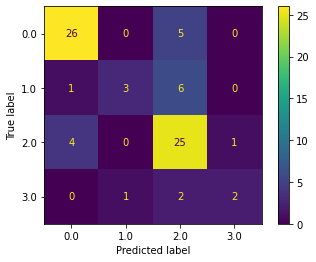

In [21]:
y_pred = nn_mclf.predict(X_test)

conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)
plot_confusion_matrix(nn_mclf, X_test, y_test)  
plt.show()


In [22]:
#calcute FP,FN,TP and TN to calcute Accuracy, precision, recall and F1 score
FP = conf_matrix.sum(axis=0) - np.diag(conf_matrix)  
FN = conf_matrix.sum(axis=1) - np.diag(conf_matrix)
TP = np.diag(conf_matrix)
TN = conf_matrix.sum() - (FP + FN + TP)

FP = FP.astype(float)
FN = FN.astype(float)
TP = TP.astype(float)
TN = TN.astype(float)

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
# Specificity or true negative rate
TNR = TN/(TN+FP) 

Accuracy = (TP + TN)/(TP + TN + FP + FN)
print(f"Accuracy: {Accuracy} %")

precision = TP / (TP + FP)
print(f"precision: {precision}")

recall = TP / (TP + FN)
print(f"recall: {recall}")

f1_score = 2 * precision * recall / (precision + recall)
print(f"f1_score: {f1_score}")


Accuracy: [0.86842105 0.89473684 0.76315789 0.94736842] %
precision: [0.83870968 0.75       0.65789474 0.66666667]
recall: [0.83870968 0.3        0.83333333 0.4       ]
f1_score: [0.83870968 0.42857143 0.73529412 0.5       ]


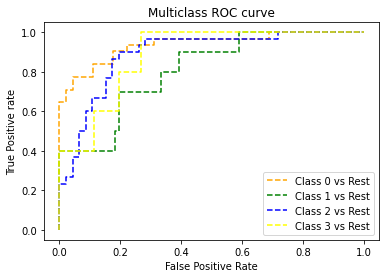

In [23]:
# Compute ROC curve and ROC area for each class

# roc curve for classes
fpr = {}
tpr = {}
thresh ={}

n_class = 4
y_prob_pred_cnb = nn_mclf.predict_proba(X_test)

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, y_prob_pred_cnb[:,i], pos_label=i)
    
# plotting    
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')
plt.plot(fpr[3], tpr[3], linestyle='--',color='yellow', label='Class 3 vs Rest')
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC',dpi=300); 




### 1.3.2 Predect with train data

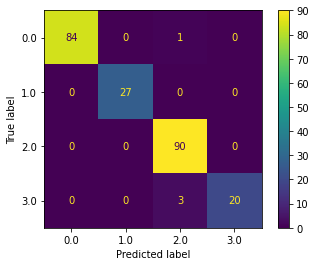

In [24]:
y_pred = nn_mclf.predict(X_train)

conf_matrix = confusion_matrix(y_true=y_train, y_pred=y_pred)
plot_confusion_matrix(nn_mclf, X_train, y_train)  
plt.show()

In [25]:

FP = conf_matrix.sum(axis=0) - np.diag(conf_matrix)  
FN = conf_matrix.sum(axis=1) - np.diag(conf_matrix)
TP = np.diag(conf_matrix)
TN = conf_matrix.sum() - (FP + FN + TP)

FP = FP.astype(float)
FN = FN.astype(float)
TP = TP.astype(float)
TN = TN.astype(float)

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
# Specificity or true negative rate
TNR = TN/(TN+FP) 

Accuracy = (TP + TN)/(TP + TN + FP + FN)
print(Accuracy)

precision = TP / (TP + FP)
print(f"precision: {precision}")

recall = TP / (TP + FN)
print(f"recall: {recall}")

f1_score = 2 * precision * recall / (precision + recall)
print(f"f1_score: {f1_score}")


[0.99555556 1.         0.98222222 0.98666667]
precision: [1.         1.         0.95744681 1.        ]
recall: [0.98823529 1.         1.         0.86956522]
f1_score: [0.99408284 1.         0.97826087 0.93023256]


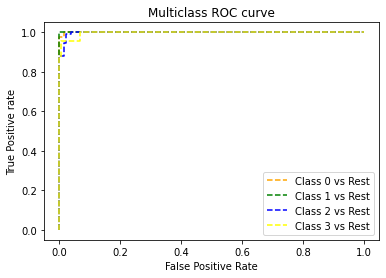

In [26]:

# Compute ROC curve and ROC area for each class


# roc curve for classes
fpr = {}
tpr = {}
thresh ={}

n_class = 4
y_prob_pred_cnb = nn_mclf.predict_proba(X_train)

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_train, y_prob_pred_cnb[:,i], pos_label=i)
    
# plotting    
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')
plt.plot(fpr[3], tpr[3], linestyle='--',color='yellow', label='Class 3 vs Rest')
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC',dpi=300); 
